In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Showing the Data Frame

In [2]:
df = pd.read_csv(r'C:\Users\ACER\archive (5)\CH4_CO_health_effect_NEW.csv')
df.head(10)

,CH4,CO2,CO,Health Effect
0,2.1,213,3,No Health Effect
1,2.1,293,2,No Health Effect
2,2.1,268,5,No Health Effect
3,2.0,275,6,No Health Effect
4,2.0,341,1,No Health Effect
5,2.0,249,2,No Health Effect
6,2.0,275,0,No Health Effect
7,2.0,340,3,No Health Effect
8,2.0,241,0,No Health Effect
9,2.0,201,5,No Health Effect


In [3]:
df = df.rename(columns={'CH4':'Methane (CH4)', 'CO2':'Carbon Dioxide (CO2)', 'CO':'Carbon Monoxide (CO)'})
df.head()

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,2.1,213,3,No Health Effect
1,2.1,293,2,No Health Effect
2,2.1,268,5,No Health Effect
3,2.0,275,6,No Health Effect
4,2.0,341,1,No Health Effect


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9065 entries, 0 to 9064
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Methane (CH4)         9065 non-null   float64
 1   Carbon Dioxide (CO2)  9065 non-null   int64  
 2   Carbon Monoxide (CO)  9065 non-null   int64  
 3   Health Effect         9065 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 283.4+ KB


In [5]:
df['Health Effect'].value_counts()

Headache, nausea, and dizziness after 5-10 minutes; collapse and unconsciousness after 30 minutes of exposure.\nDeath within 1 hour.    1743
Death within 30 minutes.                                                                                                                1562
Possible health effects with long-term exposure.                                                                                        1477
Headache, nausea, and dizziness after 20 minutes of exposure.\nDeath within 1-2 hours.                                                  1427
No Health Effect                                                                                                                         979
Loss of consciousness after 1 hour of exposure.                                                                                          515
Headache and nausea after 1-2 hours of exposure.\nLife threatening in 3 hours.                                                           458
Death within 

# Preprocessing Data

In [6]:
label_encoder = LabelEncoder()

In [7]:
#changing the string column to integer

df['Health Effect'] = label_encoder.fit_transform(df['Health Effect'])
df.head()

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,2.1,213,3,9
1,2.1,293,2,9
2,2.1,268,5,9
3,2.0,275,6,9
4,2.0,341,1,9


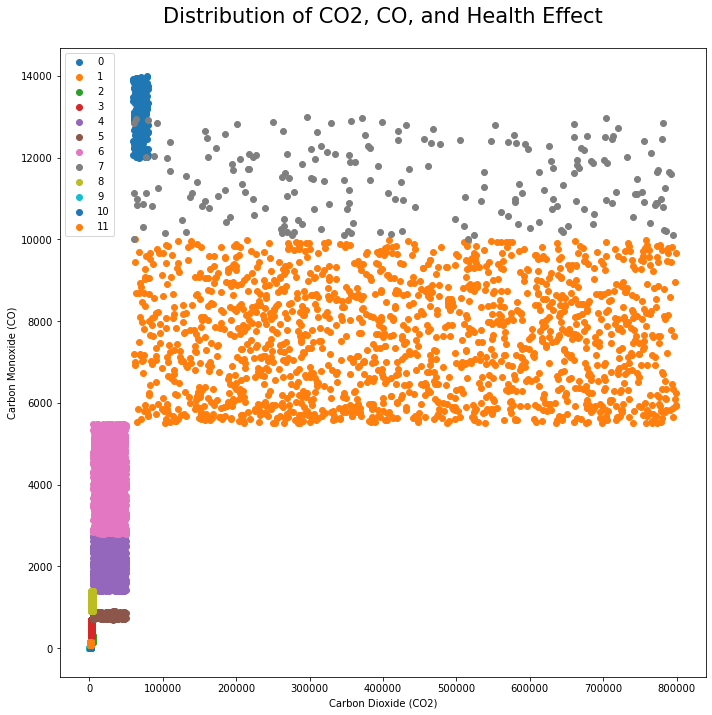

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
for he, d in df.groupby('Health Effect'):
    ax.scatter(d['Carbon Dioxide (CO2)'], d['Carbon Monoxide (CO)'], label=he)
    
plt.title('Distribution of CO2, CO, and Health Effect', fontsize=21, loc='center', y=1.03)
plt.legend(loc=0, prop={'size' : 10})
plt.xlabel('Carbon Dioxide (CO2)')
plt.ylabel('Carbon Monoxide (CO)')
plt.tight_layout()
plt.show()

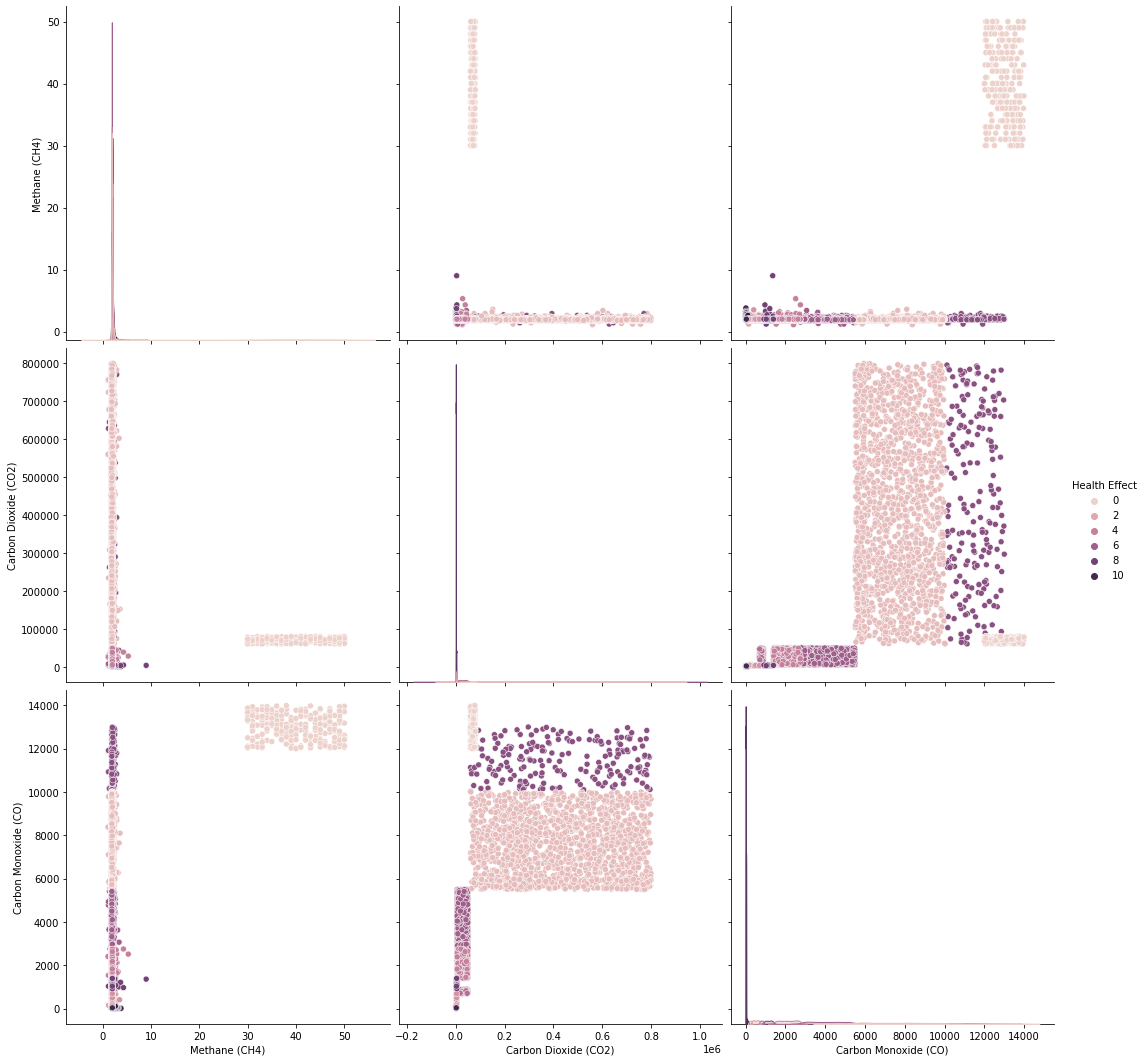

In [9]:
sns.pairplot(df, hue='Health Effect', height=5)

In [10]:
# showing the labelled categories

label_encoder.classes_

array(['Death within 1-3 minutes of exposure.',
       'Death within 30 minutes.',
       'Dizziness, naseau, fagitue, headache after 2-3 hours of exposure.',
       'Headache and nausea after 1-2 hours of exposure.\nLife threatening in 3 hours.',
       'Headache, nausea, and dizziness after 20 minutes of exposure.\nDeath within 1-2 hours.',
       'Headache, nausea, and dizziness after 45 minutes; collapse and unconsciousness after 1 hour of exposure.\nDeath within 2-3 hours.',
       'Headache, nausea, and dizziness after 5-10 minutes; collapse and unconsciousness after 30 minutes of exposure.\nDeath within 1 hour.',
       'Immediate physiological effects, unconsciousness.\nDeath within 1-3 minutes of exposure.',
       'Loss of consciousness after 1 hour of exposure.',
       'No Health Effect',
       'Possible health effects with long-term exposure.',
       'Slight headache after 1-2 hours.'], dtype=object)

# Classification

In [11]:
df.head()

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,2.1,213,3,9
1,2.1,293,2,9
2,2.1,268,5,9
3,2.0,275,6,9
4,2.0,341,1,9


In [12]:
X = np.array(df.drop(['Health Effect'],1))
y = np.array(df['Health Effect']).flatten()

print(X)
print(y)

[[2.1000e+00 2.1300e+02 3.0000e+00]
 [2.1000e+00 2.9300e+02 2.0000e+00]
 [2.1000e+00 2.6800e+02 5.0000e+00]
 ...
 [4.9000e+01 7.6098e+04 1.2801e+04]
 [3.9000e+01 7.9762e+04 1.2799e+04]
 [4.3000e+01 7.2591e+04 1.3371e+04]]
[9 9 9 ... 0 0 0]


### Training The Datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(f'X_train :\n{X_train}')
print('')
print(f'X_test :\n{X_train}')
print('')
print(f'y_train :\n{y_train}')
print('')
print(f'y_test :\n{y_test}')

X_train :
[[1.9000e+00 2.3400e+02 0.0000e+00]
 [1.9000e+00 1.1972e+04 3.6740e+03]
 [2.1000e+00 8.1840e+03 2.0430e+03]
 ...
 [1.9000e+00 7.2940e+03 5.0060e+03]
 [2.0000e+00 3.2200e+02 5.0000e+00]
 [1.9000e+00 2.3357e+04 5.2460e+03]]

X_test :
[[1.9000e+00 2.3400e+02 0.0000e+00]
 [1.9000e+00 1.1972e+04 3.6740e+03]
 [2.1000e+00 8.1840e+03 2.0430e+03]
 ...
 [1.9000e+00 7.2940e+03 5.0060e+03]
 [2.0000e+00 3.2200e+02 5.0000e+00]
 [1.9000e+00 2.3357e+04 5.2460e+03]]

y_train :
[9 6 4 ... 6 9 6]

y_test :
[ 1 10  3 ... 10  1  4]


In [15]:
K = 3
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_predict = knn.predict(X_test)
y_predict

array([ 1, 10,  3, ..., 10,  1,  4])

# Accuracy

#### Using Classification Report

In [17]:
clr = classification_report(y_test, y_predict)
print(f'Classification Report :\n{clr}\n')

Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.89      0.99      0.94       279
           2       0.93      1.00      0.96        26
           3       1.00      0.98      0.99        92
           4       0.95      0.97      0.96       287
           5       1.00      0.96      0.98        50
           6       0.97      0.96      0.97       342
           7       0.91      0.21      0.34        47
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00       192
          10       0.98      1.00      0.99       313
          11       1.00      0.71      0.83        17

    accuracy                           0.96      1813
   macro avg       0.96      0.90      0.91      1813
weighted avg       0.96      0.96      0.95      1813




# Simulation

In [18]:
# given
data = {
    'Methane (CH4)':[40, 45, 15,4,25],
    'Carbon Dioxide (CO2)':[60428, 58001, 35789,5765,49888],
    'Carbon Monoxide (CO)':[13000, 11250, 11345,1000,10785]
}

simulation = pd.DataFrame(data)
simulation

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO)
0,40,60428,13000
1,45,58001,11250
2,15,35789,11345
3,4,5765,1000
4,25,49888,10785


In [19]:
simulation['Health Effect'] = np.nan
simulation

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,40,60428,13000,NaN
1,45,58001,11250,NaN
2,15,35789,11345,NaN
3,4,5765,1000,NaN
4,25,49888,10785,NaN


In [20]:
X_new = np.array(simulation.drop('Health Effect',1))

In [21]:
y_new_prediction = knn.predict(X_new)
y_new_prediction

array([0, 7, 6, 5, 6])

In [22]:
label_encoder.inverse_transform(y_new_prediction)

array(['Death within 1-3 minutes of exposure.',
       'Immediate physiological effects, unconsciousness.\nDeath within 1-3 minutes of exposure.',
       'Headache, nausea, and dizziness after 5-10 minutes; collapse and unconsciousness after 30 minutes of exposure.\nDeath within 1 hour.',
       'Headache, nausea, and dizziness after 45 minutes; collapse and unconsciousness after 1 hour of exposure.\nDeath within 2-3 hours.',
       'Headache, nausea, and dizziness after 5-10 minutes; collapse and unconsciousness after 30 minutes of exposure.\nDeath within 1 hour.'],
      dtype=object)

### Result of Simulation

In [23]:
simulation['Health Effect'] = np.array(y_new_prediction)
simulation

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,40,60428,13000,0
1,45,58001,11250,7
2,15,35789,11345,6
3,4,5765,1000,5
4,25,49888,10785,6


In [24]:
simulation['Health Effect'] = np.array(label_encoder.inverse_transform(y_new_prediction))
simulation

,Methane (CH4),Carbon Dioxide (CO2),Carbon Monoxide (CO),Health Effect
0,40,60428,13000,Death within 1-3 minutes of exposure.
1,45,58001,11250,"Immediate physiological effects, unconsciousne..."
2,15,35789,11345,"Headache, nausea, and dizziness after 5-10 min..."
3,4,5765,1000,"Headache, nausea, and dizziness after 45 minut..."
4,25,49888,10785,"Headache, nausea, and dizziness after 5-10 min..."
